In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#### Reading Data 


In [3]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Information concerning the data frame
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Summary about the data

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#Age Average
titanic.Age.mean()

29.69911764705882

In [26]:
#Age median

titanic.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [ ]:
#Drop duplicates


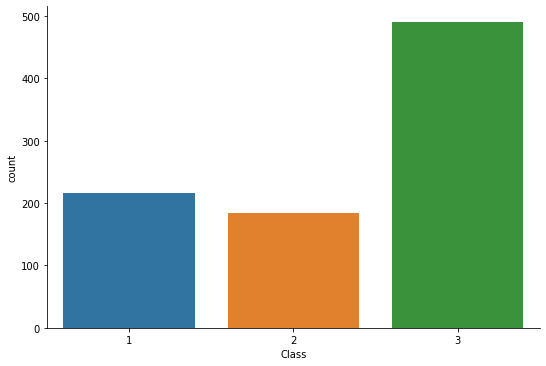

In [10]:
#Number of passengers in each class by plotting them

graph = sns.factorplot('Pclass', data=titanic, kind='count', aspect=1.5)
graph.set_xlabels('Class')

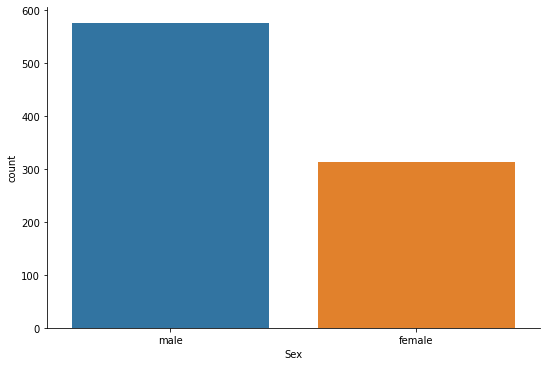

In [11]:
#number of males and females

sns.factorplot('Sex', data=titanic, kind='count', aspect=1.5)

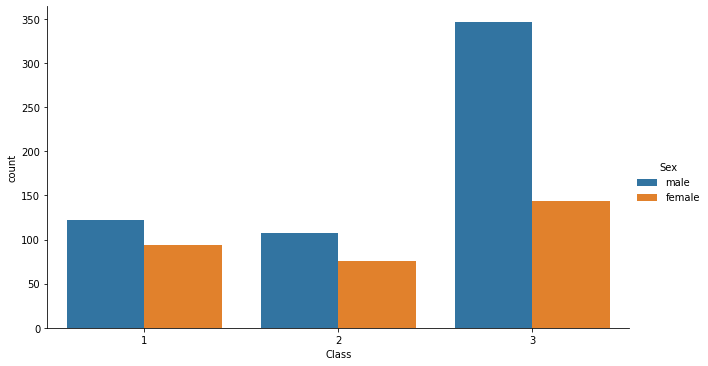

In [12]:
#plot number of women and males in each class

graph = sns.factorplot('Pclass', data=titanic, hue='Sex', kind='count', aspect=1.75)
graph.set_xlabels('Class')

In [13]:
#number of survivors per class

titanic.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


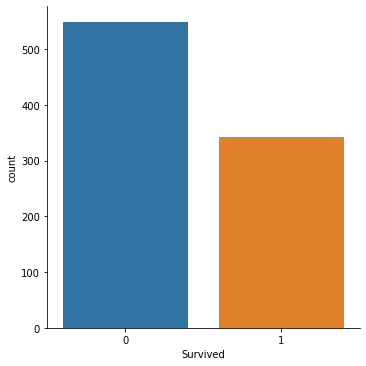

In [14]:
#Non survivors Vs Survivors

none_survivors = titanic[titanic['Survived'] ==0]

sns.factorplot('Survived', data=titanic, kind='count')

In [16]:
len(none_survivors)

549

In [17]:
#Passengers who did not survive in each class grouped by sex

none_survivors.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [22]:
#Survivors and non survivors grouped by class and sex

t = pd.crosstab(index=[titanic.Survived, titanic.Pclass], columns=[titanic.Sex, titanic.Embarked])

In [23]:
t.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [24]:
t.columns, t.index

(MultiIndex([('female', 'C'),
             ('female', 'Q'),
             ('female', 'S'),
             (  'male', 'C'),
             (  'male', 'Q'),
             (  'male', 'S')],
            names=['Sex', 'Embarked']),
 MultiIndex([(0, 1),
             (0, 2),
             (0, 3),
             (1, 1),
             (1, 2),
             (1, 3)],
            names=['Survived', 'Pclass']))